#### Задание 1 вообще


In [17]:
import pandas as pd
df = pd.read_csv(r'course/input\report.csv', sep=',')
df.shape

(85, 2)

In [18]:
df = df[~df['region_name'].isin(['Белгородская область', 'Сахалинская обл.', 'Ростовская область'])]


In [19]:
df.shape

(82, 2)

In [23]:
df = df.sort_values(by=['salary']).reset_index(drop=True)
print(df.iloc[9])
print(df.iloc[31])
print(df.iloc[41])
df

region_name    Саратовская область
salary                       26555
Name: 9, dtype: object
region_name    Новгородская область
salary                        30820
Name: 31, dtype: object
region_name    Самарская область
salary                     33086
Name: 41, dtype: object


,region_name,salary
0,Республика Дагестан,24550
1,Кабардино-Балкарская Республика,25318
2,Республика Ингушетия,25663
3,Карачаево-Черкесская Республика,25699
4,Республика Калмыкия,25719
...,...,...
77,Ненецкий АО,77277
78,г. Москва,78946
79,Ямало-Ненецкий АО,86560
80,Чукотский АО,96930


In [21]:
print(df['salary'].mean(), df['salary'].median(), df['salary'].std())

38605.26829268293 33029.5 16270.138809797947


#### Задание 1 к PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.decomposition import PCA


In [79]:
import seaborn as sns
import os
print(os.getcwd())
df_pca = pd.read_csv(os.getcwd()+r'/input/24_36.csv',header=None, sep=',', names=['x_0','x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9'], index_col=False)

C:\Users\Alexander\source\repos\ML_Statistics_ITMO\course


In [80]:
df_pca.shape

(60, 10)

In [81]:
df_pca

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9
0,15.712093,-11.090471,6.041138,9.384932,23.410896,19.092172,22.594857,8.585017,4.909075,-11.620632
1,-6.843927,-5.833855,12.324947,20.732662,1.754386,-13.009679,7.592191,1.805456,5.033979,19.687482
2,24.546691,10.152749,24.960585,-13.926374,-9.390312,11.403509,27.374245,-7.590656,-17.129066,-6.454982
3,-7.864966,4.970772,-16.212520,-17.302162,-5.225616,0.287600,23.077105,-4.112737,10.541665,25.097911
4,17.425053,-24.418646,23.499677,19.596040,10.775872,-18.186429,2.225722,15.092763,0.873772,-6.878799
5,25.962232,10.435233,26.492258,-12.688131,-9.749153,13.838166,24.630014,-7.920091,-16.515970,-5.100222
6,20.569882,-23.249013,24.757549,17.665666,9.741676,-23.033893,1.575761,15.501000,1.681690,-5.922326
7,21.762563,-23.549370,22.952305,19.684147,10.165437,-22.641973,6.099401,16.491613,1.254466,-6.716737
8,-10.263213,-6.480947,10.603294,19.763732,1.677696,-13.391831,8.335597,5.850372,2.466070,21.754593
9,-5.347897,4.059450,-18.579235,-19.177839,-5.132858,2.969021,23.732832,-3.856429,8.797755,22.914126


In [82]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df_pca)

In [83]:
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [84]:
px.scatter(x_pca, x= 0, y= 1)

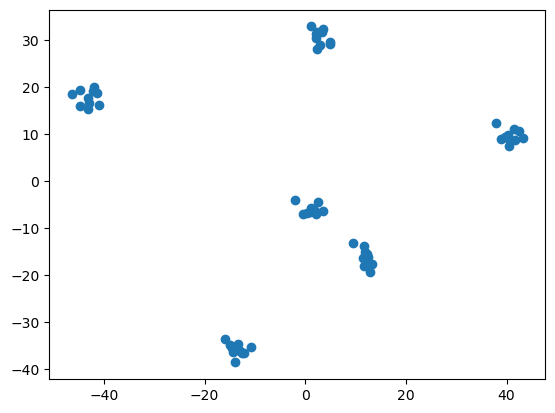

In [85]:
plt.scatter(x_pca[:,0], x_pca[:,1])

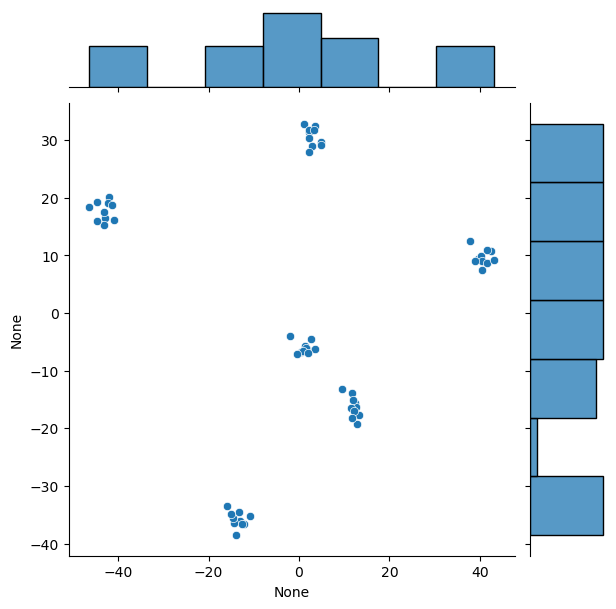

In [86]:
sns.jointplot(x=x_pca[:,0], y=x_pca[:,1])

In [87]:
pca.explained_variance_ratio_

array([0.40447276, 0.30755443])

In [88]:
print(sum(pca.explained_variance_ratio_))

0.7120271952991059


In [89]:
pca.singular_values_

array([196.58919025, 171.42572272])

In [90]:
x_pca

array([[ 11.72837912, -13.87473339],
       [  4.94727181,  29.6658536 ],
       [-13.00320982, -36.12073589],
       [-42.09425874,  20.10986854],
       [ 39.6729837 ,   9.36432095],
       [-12.18795117, -36.53902327],
       [ 40.28519691,   9.87170065],
       [ 40.54898102,   8.96464877],
       [  3.46330482,  32.41666869],
       [-42.95222829,  16.56611601],
       [  9.4957194 , -13.11189767],
       [  1.95191062,  -6.38290061],
       [ 38.9380706 ,   9.0125364 ],
       [-14.40985394, -36.33908758],
       [-14.64456201, -35.48626092],
       [  1.22797121,  -5.68694643],
       [-43.09355754,  15.30771236],
       [-13.99858251, -38.53122934],
       [ 41.5949536 ,   8.67846305],
       [  2.98008934,  28.91837545],
       [ 12.3027067 , -15.52982107],
       [  1.47096109,  -6.00891195],
       [  1.06916763,  32.87239871],
       [  2.58836824,  -4.52486966],
       [ 12.79440039, -19.30371588],
       [  2.17950437,  31.36971991],
       [  3.60958207,  -6.2933133 ],
 

In [91]:
x_pca_reversed = pca.inverse_transform(x_pca)

In [92]:
x_pca_reversed

array([[ 1.66412080e+01, -3.09951015e+00,  1.95040768e+01,
         4.76895801e+00,  9.22886088e+00,  3.47461785e+00,
         1.68298486e+01,  4.88333105e+00,  5.46442097e-01,
        -1.05521740e+01],
       [-3.54856579e+00, -9.97290091e+00,  3.19165371e+00,
         1.38718867e+01,  6.14299319e+00, -1.41046259e+01,
         8.58438828e+00,  7.80101006e+00,  1.12114787e+01,
         1.45305161e+01],
       [ 2.03186581e+01,  1.14047304e+01,  1.67501722e+01,
        -1.42067359e+01,  3.40397795e+00,  1.92658582e+01,
         2.73819422e+01, -4.19016532e+00, -5.01545453e+00,
        -1.32123042e+01],
       [-1.05424548e+01,  1.04552214e+01, -1.23128496e+01,
        -1.27809740e+01, -5.91885149e+00,  1.47377369e+00,
         2.13048584e+01, -5.89040444e+00,  8.67654925e+00,
         2.65042157e+01],
       [ 1.32961058e+01, -1.90734217e+01,  2.32102948e+01,
         2.56631763e+01,  1.58673803e+01, -1.35308744e+01,
         5.33255197e+00,  1.49290375e+01,  6.36506070e+00,
        -8.

In [95]:
first = df_pca.iloc[0] 
transformed_first = pca.transform(first.to_frame().T)[:, :2][0]
print('Transform для первого объекта:', transformed_first)

Transform для первого объекта: [ 11.72837912 -13.87473339]


### Упражнение 2

In [105]:
from numpy import genfromtxt


In [106]:
x_reduced = genfromtxt(os.getcwd()+r'/input/X_reduced_536.csv', delimiter=';')
x_loadings = genfromtxt(os.getcwd()+r'/input/X_loadings_536.csv', delimiter=';')

In [109]:
x_start = x_reduced @ x_loadings.T

In [110]:
print(x_start.shape)
print(x_reduced.shape)
print(x_loadings.shape)

(100, 100)
(100, 10)
(100, 10)


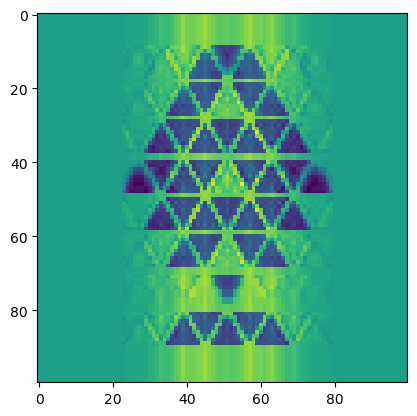

In [111]:
plt.imshow(x_start)

In [4]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression

In [5]:
data = pd.read_csv(os.getcwd()+r'/input/data.csv', sep=',')
data.shape

(10, 3)

In [6]:
liear = LinearRegression().fit(data[['X']], data[['Y']])

In [10]:
liear.score(data[['X']], data[['Y']])

0.9446284827776337

In [11]:
print(data['X'].mean(), data['Y'].mean())

12.8 31.0


In [14]:
print(liear.coef_)

[[2.4930265]]


In [12]:
liear.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

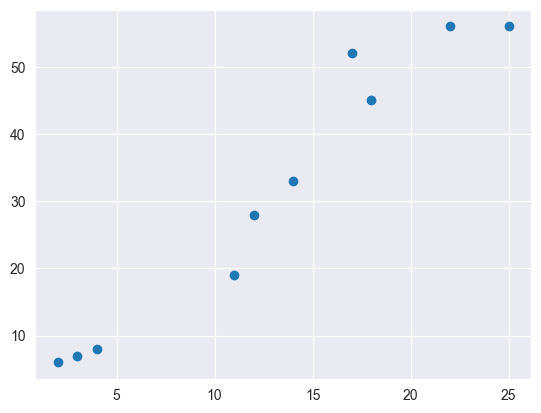

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(data[['X']], data[['Y']])

In [15]:
liear.intercept_

array([-0.91073919])